In [ ]:
#Liên kết file Colab hiện tại với Google Drive

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import math
# Importing the most popular regression libraries.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [ ]:
#Đọc file dữ liệu từ Drive

df = pd.read_csv("/content/gdrive/MyDrive/Python/Resources/weight-height-custom (1).csv")

In [ ]:
#Thêm dữ liệu vào bằng phương pháp thủ công

new_data = {
    "Gender": ["Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male"],
    "Height": [180, 177, 165, 154, 178, 146, 155, 164, 189, 156],
    "Weight": [78, 70, 71, 56, 67, 48, 47, 58, 72, 47]
}
df_new = pd.DataFrame(new_data, index = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
df = df.append(df_new)

In [ ]:
#In dataframe dữ liệu

df

,Gender,Height,Weight
0,Male,147,49
1,Female,150,50
2,Male,153,51
3,Male,155,51
4,Male,168,60
5,Male,170,62
6,Male,173,68
7,Male,175,65
8,Male,178,66
9,Male,180,71


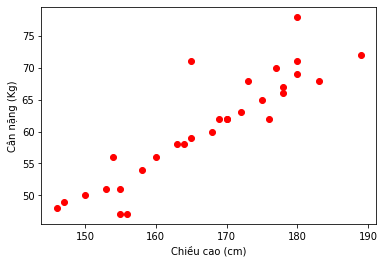

In [ ]:
#Vẽ biểu đồ phân bố dữ liệu

plt.plot(df.Height, df.Weight, 'ro')
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Cân nặng (Kg)")
plt.show()

In [ ]:
#Huấn luyện model Linear Regression

X = df.loc[:,["Height"]].values #Dữ liệu đầu vào (chiều cao)
Y = df.Weight.values #Dữ liệu đầu ra (cân nặng)
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#In danh sách dữ liệu đầu vào (chiều cao)

X

array([[147],
       [150],
       [153],
       [155],
       [168],
       [170],
       [173],
       [175],
       [178],
       [180],
       [183],
       [165],
       [163],
       [160],
       [158],
       [169],
       [172],
       [170],
       [176],
       [180],
       [180],
       [177],
       [165],
       [154],
       [178],
       [146],
       [155],
       [164],
       [189],
       [156]])

In [ ]:
#In danh sách dữ liệu đầu ra (cân nặng)

Y

array([49, 50, 51, 51, 60, 62, 68, 65, 66, 71, 68, 59, 58, 56, 54, 62, 63,
       62, 62, 69, 78, 70, 71, 56, 67, 48, 47, 58, 72, 47])

In [ ]:
#Thông tin model

mse = mean_squared_error(model.predict(X), Y)
print("Tổng bình phương sai số trên tập mẫu: ", mse)
print("Hệ số hồi quy: ", model.coef_)
print("Sai số: ", model.intercept_)
print(model.coef_, model.intercept_ )

Tổng bình phương sai số trên tập mẫu:  12.766336905507545
Hệ số hồi quy:  [0.66143854]
Sai số:  -49.77152099117108
[0.66143854] -49.77152099117108


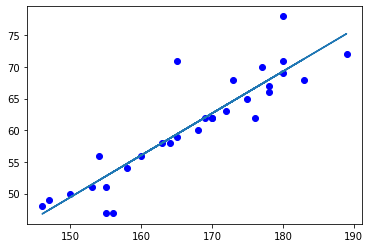

In [ ]:
#Vẽ biểu đồ phân bố dữ liệu và đường biểu diễn trọng số tính được

plt.scatter(X, Y, c = "b")
plt.plot(X, model.predict(X))
plt.show()

In [ ]:
#Dự đoán cân nặng dựa vào chiều cao nhập vào

while(True):
  x = float(input("Nhập chiều cao (nhập 0 để dừng): "))
  if x<=0:
    break
  print("Người cao ", x, "cm, dự báo cân nặng", model.predict([[x]]))

Nhập chiều cao (nhập 0 để dừng): 169
Người cao  169.0 cm, dự báo cân nặng [62.01159169]
Nhập chiều cao (nhập 0 để dừng): 196
Người cao  196.0 cm, dự báo cân nặng [79.87043218]
Nhập chiều cao (nhập 0 để dừng): 0
